In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random

%matplotlib inline

In [2]:
data = pd.read_csv("adult.data")

In [3]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
columns=["age","workclass","final_weight","education","education-num",
         "marital-status","occupation","relationship","race","sex",
         "capital-gain","capital-loss","hours-per-week","native-country",
         "Income"]

In [5]:
data.columns = columns

In [6]:
data.head()

,age,workclass,final_weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   final_weight    32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.shape

(32560, 15)

In [9]:
data["native-country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [10]:
data["occupation"].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

#### Exploratory Data Analysis

In [11]:
#Income

print(data["Income"].value_counts())

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


In [12]:
print("<=50 --->",(data["Income"].value_counts()[0]*100)/data.shape[0])
print(">50 --->",100-((data["Income"].value_counts()[0]*100)/data.shape[0]))

<=50 ---> 75.91830466830467
>50 ---> 24.08169533169533


C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

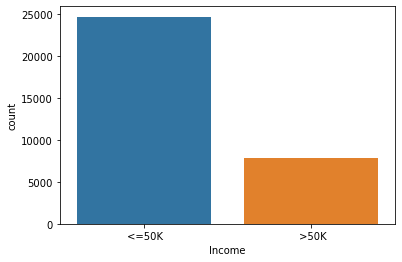

In [13]:
sns.countplot(data["Income"])

In [14]:
print(data.isnull().sum())

age               0
workclass         0
final_weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64


In [15]:
#Sex
data["sex"].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

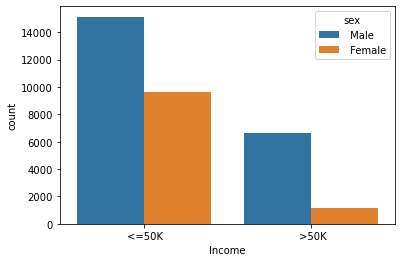

In [16]:
sns.countplot(x=data["Income"],hue=data["sex"])

In [17]:
data.groupby(["Income"])["sex"].value_counts()

Income  sex    
 <=50K   Male      15127
         Female     9592
 >50K    Male       6662
         Female     1179
Name: sex, dtype: int64

In [18]:
#Race

data["race"].value_counts()/data.shape[0]

 White                 0.854269
 Black                 0.095946
 Asian-Pac-Islander    0.031910
 Amer-Indian-Eskimo    0.009552
 Other                 0.008323
Name: race, dtype: float64

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None, None, None, None, None, None, None]

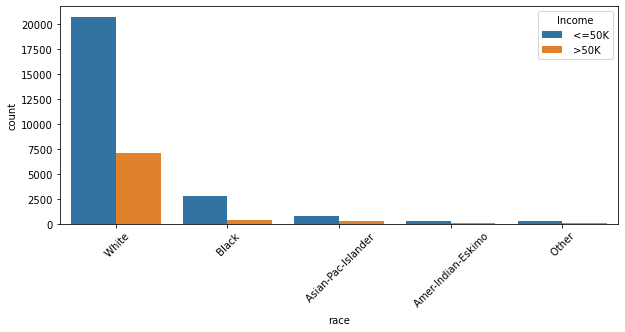

In [19]:
plt.figure(figsize=(10,4))
plot=sns.countplot(data["race"],hue=data["Income"])
plt.setp(plot.get_xticklabels(), rotation=45)

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None, None, None, None, None, None, None, None, None]

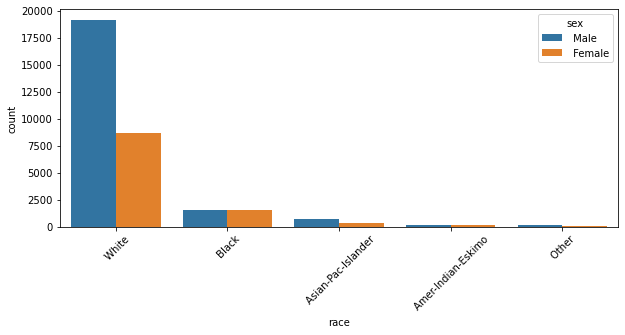

In [20]:
plt.figure(figsize=(10,4))
plot=sns.countplot(data["race"],hue=data["sex"])
plt.setp(plot.get_xticklabels(), rotation=45)

In [21]:
#Native Country

data["native-country"].value_counts()/data.shape[0]

 United-States                 0.895854
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004208
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003256
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


In [22]:
x=data.groupby(["native-country","Income"])["Income"].aggregate(count="count").reset_index()

In [23]:
x[x["Income"]==" <=50K"].sort_values(by=["count"],ascending=False)

,native-country,Income,count
76,United-States,<=50K,21998
51,Mexico,<=50K,610
0,?,<=50K,437
58,Philippines,<=50K,137
64,Puerto-Rico,<=50K,102
16,El-Salvador,<=50K,97
22,Germany,<=50K,93
4,Canada,<=50K,82
45,Jamaica,<=50K,71
10,Cuba,<=50K,70


In [24]:
x[x["Income"]==" >50K"].sort_values(by=["count"],ascending=False)

,native-country,Income,count
77,United-States,>50K,7171
1,?,>50K,146
59,Philippines,>50K,61
23,Germany,>50K,44
38,India,>50K,40
5,Canada,>50K,39
52,Mexico,>50K,33
19,England,>50K,30
44,Italy,>50K,25
11,Cuba,>50K,25


In [25]:
#Relationship

data["relationship"].value_counts()/data.shape[0]

 Husband           0.405190
 Not-in-family     0.255037
 Own-child         0.155651
 Unmarried         0.105835
 Wife              0.048157
 Other-relative    0.030129
Name: relationship, dtype: float64

In [26]:
data.groupby(["relationship","Income"])["Income"].count()

relationship     Income
 Husband          <=50K    7275
                  >50K     5918
 Not-in-family    <=50K    7448
                  >50K      856
 Other-relative   <=50K     944
                  >50K       37
 Own-child        <=50K    5001
                  >50K       67
 Unmarried        <=50K    3228
                  >50K      218
 Wife             <=50K     823
                  >50K      745
Name: Income, dtype: int64

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relationship', ylabel='count'>

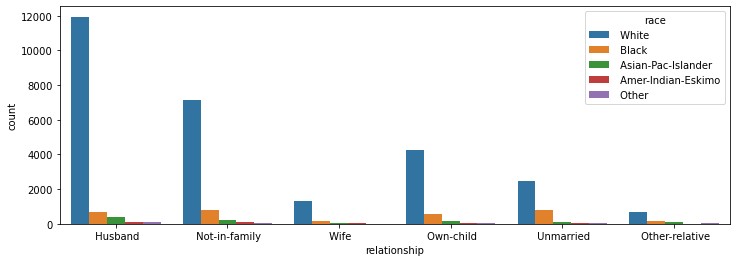

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(data["relationship"],hue=data["race"])

In [28]:
#Marital-Status

data["marital-status"].value_counts()/data.shape[0]

 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

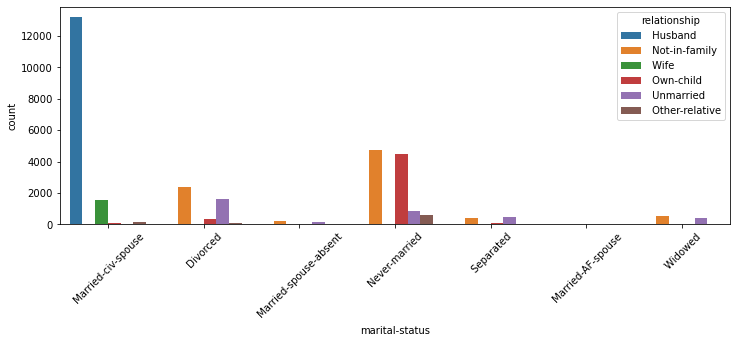

In [29]:
plt.figure(figsize=(12,4))
plot=sns.countplot(data["marital-status"],hue=data["relationship"])
plt.xticks(rotation=45)

In [30]:
#Occupation

data["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

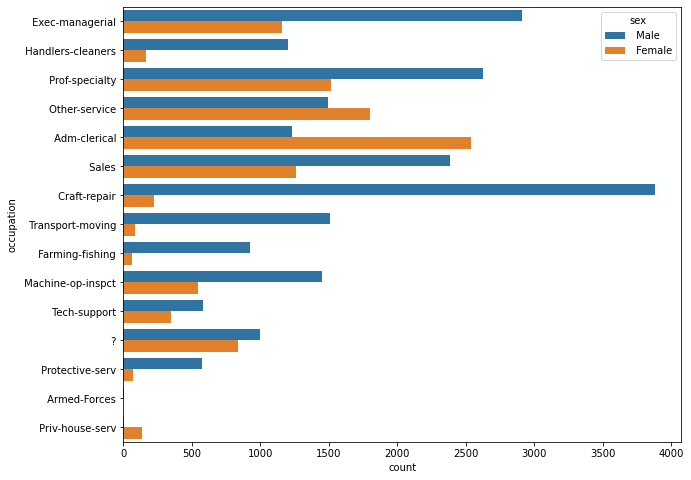

In [31]:
plt.figure(figsize=(10,8))
plot=sns.countplot(y=data["occupation"],hue=data["sex"])

In [32]:
y=data.groupby(["occupation","Income"])["Income"].aggregate(count="count").reset_index()
y[y["Income"]==" <=50K"].sort_values(by=["count"],ascending=False)

,occupation,Income,count
2,Adm-clerical,<=50K,3262
6,Craft-repair,<=50K,3170
16,Other-service,<=50K,3158
24,Sales,<=50K,2667
20,Prof-specialty,<=50K,2281
8,Exec-managerial,<=50K,2098
14,Machine-op-inspct,<=50K,1752
0,?,<=50K,1652
12,Handlers-cleaners,<=50K,1284
28,Transport-moving,<=50K,1277


In [33]:
y[y["Income"]==" >50K"].sort_values(by=["count"],ascending=False)

,occupation,Income,count
9,Exec-managerial,>50K,1968
21,Prof-specialty,>50K,1859
25,Sales,>50K,983
7,Craft-repair,>50K,929
3,Adm-clerical,>50K,507
29,Transport-moving,>50K,320
27,Tech-support,>50K,283
15,Machine-op-inspct,>50K,250
23,Protective-serv,>50K,211
1,?,>50K,191


In [34]:
#Education

data["education"].value_counts()/data.shape[0]

 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64

In [35]:
y=data.groupby(["education","occupation"])["occupation"].aggregate(count="count").reset_index()

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

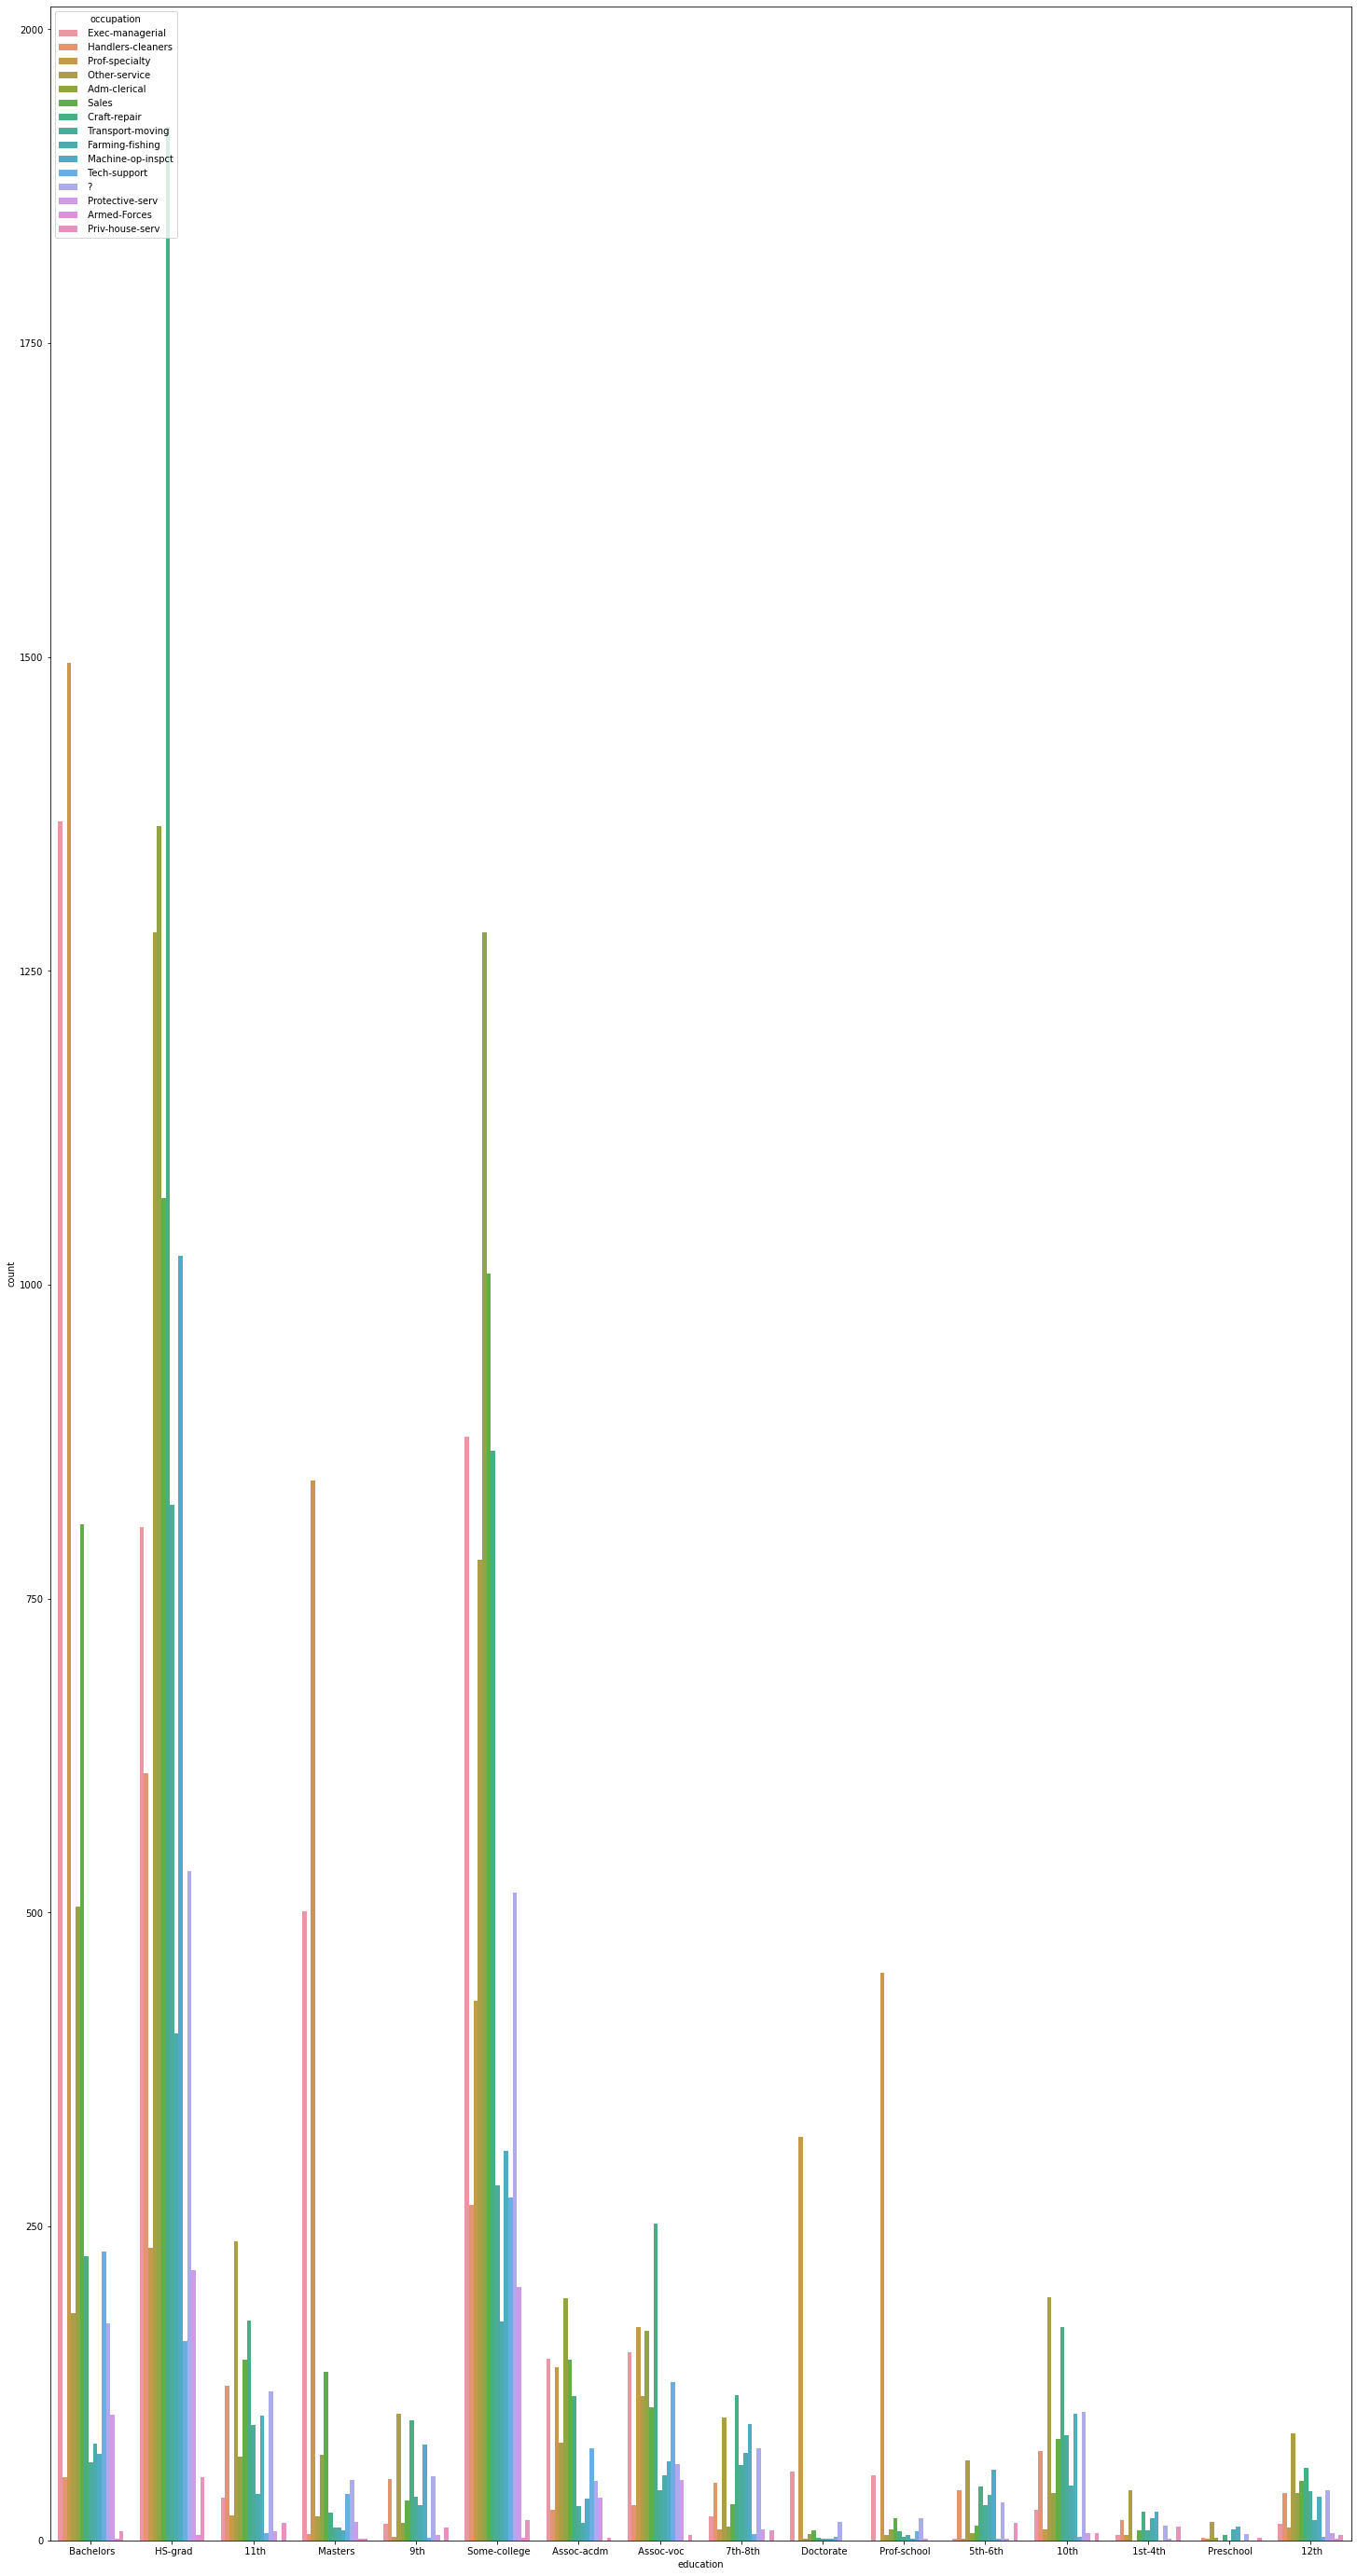

In [36]:
plt.figure(figsize=(25,50))
sns.countplot(data["education"],hue=data["occupation"])

In [37]:
#Workclass

data["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [38]:
y=data.groupby(["workclass","occupation"])["occupation"].aggregate(count="count").reset_index()

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

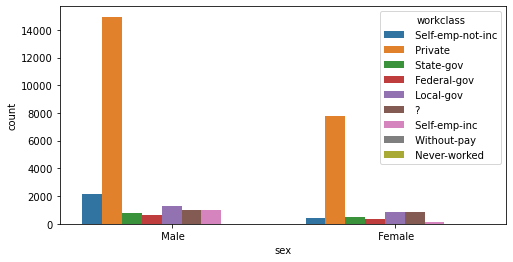

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(data["sex"],hue=data["workclass"])

In [40]:
#Age

data.describe()["age"]

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

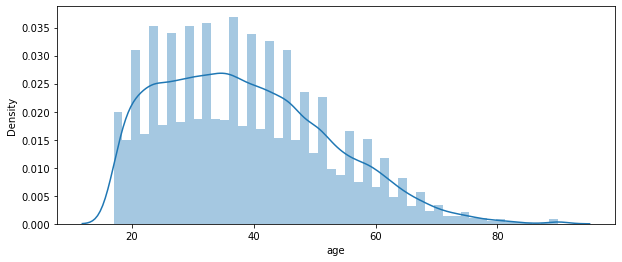

In [41]:
plt.figure(figsize=(10,4))
sns.distplot(data["age"])

In [42]:
#Education Number

data["education-num"].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [43]:
data.groupby(["education-num","Income"])["Income"].aggregate(count="count").sort_values(by=["count"])

,,count
education-num,Income,
2,>50K,6
3,>50K,16
5,>50K,27
8,>50K,33
4,>50K,40
1,<=50K,51
7,>50K,60
6,>50K,62
16,<=50K,107


In [44]:
#Hours-per-week

data.describe()["hours-per-week"]

count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

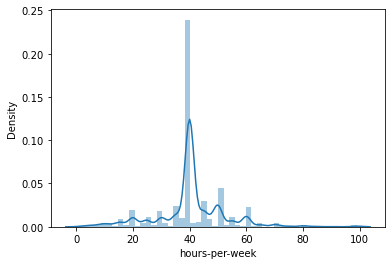

In [45]:
sns.distplot(data["hours-per-week"])

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

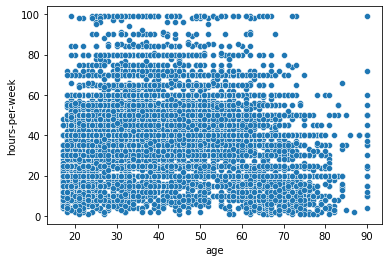

In [46]:
sns.scatterplot(data["age"],data["hours-per-week"])

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num', ylabel='hours-per-week'>

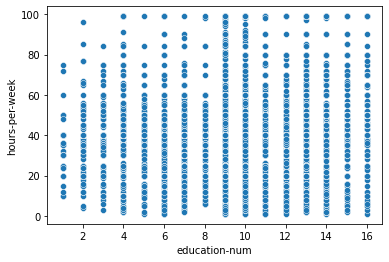

In [47]:
sns.scatterplot(data["education-num"],data["hours-per-week"])

C:\Users\navishar\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='education-num'>

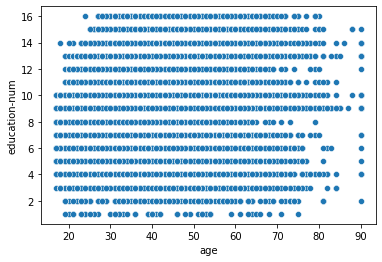

In [48]:
sns.scatterplot(data["age"],data["education-num"])

#### Data Preprocessing 

In [50]:
data["native-country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [51]:
def country(value):
    if value==" United-States":
        return value
    else:
        return " Others"

In [52]:
data["native-country"]=data["native-country"].apply(country)

In [54]:
data["native-country"].value_counts()

 United-States    29169
 Others            3391
Name: native-country, dtype: int64

In [55]:
data["usa"]=np.where(data["native-country"]==" United-States",1,0)

In [56]:
data.drop("native-country",axis=1,inplace=True)

In [57]:
data.drop("final_weight",axis=1,inplace=True)

In [58]:
data["Income"]=np.where(data["Income"]==" >50K",1,0)

In [59]:
def capital(value):
    if value>0:
        return 1
    else:
        return 0

In [60]:
data["capital-gain"]=data["capital-gain"].apply(capital)  
    
data["capital-loss"]=data["capital-loss"].apply(capital)

In [61]:
data["male"]=np.where(data["sex"]==" Male",1,0)
data.drop("sex",axis=1,inplace=True)

In [63]:
def race(value):
    if (value==" Asian-Pac-Islander") or (value== " Amer-Indian-Eskimo"):
        return " Other"
    else:
        return value

In [64]:
data["race"]=data["race"].apply(race)  

data["white"]=np.where(data["race"]==" White",1,0)

data["black"]=np.where(data["race"]==" Black",1,0)

In [65]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,Income,usa,male,white,black
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,0,1,1,1,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,0,1,1,1,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,0,1,1,0,1
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,0,0,0,0,1
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,40,0,1,0,1,0


In [66]:
data.drop("race",axis=1,inplace=True)

In [67]:
# Converting '?' in the occupation column

list1=list(data["occupation"].unique())
list1.remove(" ?")

def randomch(value):
    choice=random.choice(list1)
    if value==" ?":
        return choice
    else:
        return value
    
data["occupation"]=data["occupation"].apply(randomch)

In [68]:
# Converting '?' in the workclass column

list2=list(data["workclass"].unique())
list2.remove(" ?")

def randwork(value):
    choice=random.choice(list2)
    if value==" ?":
        return choice
    else:
        return value
    
data["workclass"]=data["workclass"].apply(randwork)

In [69]:
def edu(value):
    if value in [" 11th"," 9th"," 7th-8th"," 5th-6th"," 10th"," 1st-4th"," 12th"]:
        return " In-school"
    else:
        return value

data["education"]=data["education"].apply(edu)

In [70]:
map1=data.groupby(["workclass"])["Income"].mean().reset_index()
map1=dict(zip(map1["workclass"],map1["Income"]))

data["workclass"]=data["workclass"].map(map1)

In [71]:
map2=data.groupby("marital-status")["Income"].mean().reset_index()
map2=dict(zip(map2["marital-status"],map2["Income"]))

data["marital-status"]=data["marital-status"].map(map2)

In [72]:
map3=data.groupby("relationship")["Income"].mean().reset_index()
map3=dict(zip(map3["relationship"],map3["Income"]))

data["relationship"]=data["relationship"].map(map3)

In [73]:
map4=data.groupby("occupation")["Income"].mean().reset_index()
map4=dict(zip(map4["occupation"],map4["Income"]))

data["occupation"]=data["occupation"].map(map4)

In [74]:
map5=data.groupby("education")["Income"].mean().reset_index()
map5=dict(zip(map5["education"],map5["Income"]))

data["education"]=data["education"].map(map5)

In [75]:
X=data.drop("Income",axis=1)
y=data["Income"]

#### Handling Imbalanced Dataset

In [77]:
from imblearn.over_sampling import SMOTE 

In [78]:
sm=SMOTE(sampling_strategy=1.0,random_state=23)
X_train,y_train=sm.fit_resample(X, y) 

In [79]:
y_train.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [85]:
test = pd.read_csv("adult.test").reset_index()

In [88]:
test.columns=columns

In [89]:
test.drop("final_weight",axis=1,inplace=True)

In [90]:
test["capital-gain"]=test["capital-gain"].apply(capital)

In [91]:
test["capital-loss"]=test["capital-loss"].apply(capital) 

In [92]:
test["race"]=test["race"].apply(race)

In [93]:
test["white"]=np.where(test["race"]==" White",1,0)
test["black"]=np.where(test["race"]==" Black",1,0)
test.drop("race",axis=1,inplace=True)

In [94]:
test["male"]=np.where(test["sex"]==" Male",1,0)
test.drop("sex",axis=1,inplace=True)

In [95]:
test["Income"]=np.where(test["Income"]==" >50K.",1,0)

In [96]:
test["occupation"]=test["occupation"].apply(randomch) 

In [97]:
test["workclass"]=test["workclass"].apply(randwork)

In [98]:
test["native-country"]=test["native-country"].apply(country)

In [99]:
test["workclass"]=test["workclass"].map(map1)
test["marital-status"]=test["marital-status"].map(map2)
test["relationship"]=test["relationship"].map(map3)
test["occupation"]=test["occupation"].map(map4)

In [100]:
test["education"]=test["education"].apply(edu)

test["education"]=test["education"].map(map5)

In [101]:
test["usa"]=np.where(test["native-country"]==" United-States",1,0)
test.drop("native-country",axis=1,inplace=True)

X_test=test.drop("Income",axis=1)
y_test=test["Income"]

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
pred=model.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [106]:
conf=confusion_matrix(pred,y_test)

In [107]:
accuracy_score(y_test,pred)

0.8194214114612125

<AxesSubplot:>

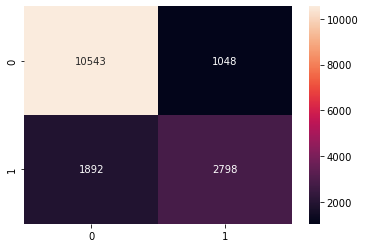

In [108]:
sns.heatmap(conf,annot=True,fmt="g")

In [109]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     12435
           1       0.60      0.73      0.66      3846

    accuracy                           0.82     16281
   macro avg       0.75      0.79      0.77     16281
weighted avg       0.84      0.82      0.83     16281

